# Games and Decisions in Data Analysis and Modelling

### HW3 By : Fares Ghazzawi


In [156]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from networkx.algorithms import centrality

### Data Preperation

In [157]:
data = pd.read_csv("trumpworld.csv")

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entity A Type  3380 non-null   object
 1   Entity A       3380 non-null   object
 2   Entity B Type  3380 non-null   object
 3   Entity B       3380 non-null   object
 4   Connection     3380 non-null   object
 5   Source(s)      3380 non-null   object
dtypes: object(6)
memory usage: 158.6+ KB


In [159]:
data.head()

Entity A Type                            Entity A Entity B Type  \
0  Organization     4 SHADOW TREE LANE MEMBER CORP.  Organization   
1  Organization  40 WALL DEVELOPMENT ASSOCIATES LLC  Organization   
2  Organization                  40 WALL STREET LLC  Organization   
3  Organization         40 WALL STREET MEMBER CORP.  Organization   
4  Organization                401 MEZZ VENTURE LLC  Organization   

                        Entity B Connection  \
0         4 SHADOW TREE LANE LLC  Ownership   
1             40 WALL STREET LLC  Ownership   
2  40 WALL STREET COMMERCIAL LLC  Ownership   
3             40 WALL STREET LLC  Ownership   
4   401 NORTH WABASH VENTURE LLC  Ownership   

                                           Source(s)  
0  https://www.documentcloud.org/documents/283869...  
1  https://www.documentcloud.org/documents/283869...  
2  https://www.documentcloud.org/documents/283869...  
3  https://www.documentcloud.org/documents/283869...  
4  https://www.documentcloud.org/documents/283869...

In [160]:
data = data[data['Entity A Type'] != 'Organization' ]

In [161]:
data.head()

Entity A Type              Entity A Entity B Type  \
10        Person          AARON SCHOCK        Person   
11        Person          AARON SCHOCK        Person   
12        Person  ABDUL WAHID AL ULAMA  Organization   
13        Person  ABDUL WAHID AL ULAMA  Organization   
14        Person           ABE WALLACH  Organization   

                        Entity B  \
10               ANNIE DONALDSON   
11                    DON MCGAHN   
12       NITTO WORLD CO. LIMITED   
13         SLC TURNBERRY LIMITED   
14  THE TRUMP ORGANIZATION, INC.   

                                           Connection  \
10                        Provided legal services for   
11          McGahn provided legal services for Schock   
12                                    Former director   
13                                    Former director   
14  Former executive vice president of acquisition...   

                                            Source(s)  
10  https://www.documentcloud.org/documents/353404...  
11  https://www.documentcloud.org/documents/353509...  
12  https://beta.companieshouse.gov.uk/company/021...  
13  https://beta.companieshouse.gov.uk/company/SC1...  
14  https://www.nytimes.com/2016/05/31/us/politics...

In [162]:
data = data[data['Entity B Type'] != 'Organization' ]

In [163]:
data.head()

Entity A Type           Entity A Entity B Type          Entity B  \
10        Person       AARON SCHOCK        Person   ANNIE DONALDSON   
11        Person       AARON SCHOCK        Person        DON MCGAHN   
41        Person      ALEXANDER NIX        Person     BRAD PARSCALE   
46        Person  ALLEN WEISSELBERG        Person  JACK WEISSELBERG   
74        Person      ANAR MAMMADOV        Person     ZIYA MAMMADOV   

                                           Connection  \
10                        Provided legal services for   
11          McGahn provided legal services for Schock   
41  Pascale says he hired Nix's company, Cambridge...   
46                                       Parent/child   
74                                       Parent/child   

                                            Source(s)  
10  https://www.documentcloud.org/documents/353404...  
11  https://www.documentcloud.org/documents/353509...  
41  https://www.washingtonpost.com/politics/trumps...  
46  https://www.nytimes.com/2016/05/24/business/de...  
74      https://www.meydan.tv/en/site/politics/13787/

In [164]:
data = data[data['Entity B Type'] != 'Federal Agency' ]

In [165]:
data.head()

Entity A Type           Entity A Entity B Type          Entity B  \
10        Person       AARON SCHOCK        Person   ANNIE DONALDSON   
11        Person       AARON SCHOCK        Person        DON MCGAHN   
41        Person      ALEXANDER NIX        Person     BRAD PARSCALE   
46        Person  ALLEN WEISSELBERG        Person  JACK WEISSELBERG   
74        Person      ANAR MAMMADOV        Person     ZIYA MAMMADOV   

                                           Connection  \
10                        Provided legal services for   
11          McGahn provided legal services for Schock   
41  Pascale says he hired Nix's company, Cambridge...   
46                                       Parent/child   
74                                       Parent/child   

                                            Source(s)  
10  https://www.documentcloud.org/documents/353404...  
11  https://www.documentcloud.org/documents/353509...  
41  https://www.washingtonpost.com/politics/trumps...  
46  https://www.nytimes.com/2016/05/24/business/de...  
74      https://www.meydan.tv/en/site/politics/13787/

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 10 to 3374
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Entity A Type  381 non-null    object
 1   Entity A       381 non-null    object
 2   Entity B Type  381 non-null    object
 3   Entity B       381 non-null    object
 4   Connection     381 non-null    object
 5   Source(s)      381 non-null    object
dtypes: object(6)
memory usage: 20.8+ KB


In [167]:
data = data.drop(['Entity A Type', 'Entity B Type'], axis = 1)

In [168]:
data.rename(columns = {'Entity A':'FPerson', 'Entity B':'SPerson'}, inplace = True)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 10 to 3374
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FPerson     381 non-null    object
 1   SPerson     381 non-null    object
 2   Connection  381 non-null    object
 3   Source(s)   381 non-null    object
dtypes: object(4)
memory usage: 14.9+ KB


In [170]:
data.head()

FPerson           SPerson  \
10       AARON SCHOCK   ANNIE DONALDSON   
11       AARON SCHOCK        DON MCGAHN   
41      ALEXANDER NIX     BRAD PARSCALE   
46  ALLEN WEISSELBERG  JACK WEISSELBERG   
74      ANAR MAMMADOV     ZIYA MAMMADOV   

                                           Connection  \
10                        Provided legal services for   
11          McGahn provided legal services for Schock   
41  Pascale says he hired Nix's company, Cambridge...   
46                                       Parent/child   
74                                       Parent/child   

                                            Source(s)  
10  https://www.documentcloud.org/documents/353404...  
11  https://www.documentcloud.org/documents/353509...  
41  https://www.washingtonpost.com/politics/trumps...  
46  https://www.nytimes.com/2016/05/24/business/de...  
74      https://www.meydan.tv/en/site/politics/13787/

In [171]:
data.to_csv('Trump_Edges.csv', index=False)

In [172]:
data = pd.read_csv("Trump_Edges.csv")

In [173]:
data.head()

FPerson           SPerson  \
0       AARON SCHOCK   ANNIE DONALDSON   
1       AARON SCHOCK        DON MCGAHN   
2      ALEXANDER NIX     BRAD PARSCALE   
3  ALLEN WEISSELBERG  JACK WEISSELBERG   
4      ANAR MAMMADOV     ZIYA MAMMADOV   

                                          Connection  \
0                        Provided legal services for   
1          McGahn provided legal services for Schock   
2  Pascale says he hired Nix's company, Cambridge...   
3                                       Parent/child   
4                                       Parent/child   

                                           Source(s)  
0  https://www.documentcloud.org/documents/353404...  
1  https://www.documentcloud.org/documents/353509...  
2  https://www.washingtonpost.com/politics/trumps...  
3  https://www.nytimes.com/2016/05/24/business/de...  
4      https://www.meydan.tv/en/site/politics/13787/

### Create Graph 

In [174]:
def create_graph_fromDF (Edges_DF):
    G = nx.Graph()
    netowrk_edges =zip(Edges_DF['FPerson'],Edges_DF['SPerson'])
    G.add_edges_from(netowrk_edges)
    attr ={}
    for index, row in Edges_DF.iterrows():
      tmp_tuple = (row['FPerson'],row['SPerson'])
      attr [tmp_tuple] = {}
      attr [tmp_tuple]['Connection'] = row['Connection']
      attr [tmp_tuple]['Source'] = row['Source(s)']
    nx.set_edge_attributes(G,attr)
    return G

In [175]:
G = create_graph_fromDF(data)

In [176]:
for node in G.nodes:
  print (node)

AARON SCHOCK
ANNIE DONALDSON
DON MCGAHN
ALEXANDER NIX
BRAD PARSCALE
ALLEN WEISSELBERG
JACK WEISSELBERG
ANAR MAMMADOV
ZIYA MAMMADOV
ANDREW BREMBERG
MIKE FERGUSON
MITCH MCCONNELL
SCOTT WALKER
ANDY PUZDER
WILLIAM P. FOLEY
ANTHONY SCARAMUCCI
KIRILL DMITRIEV
AVRAM LEBOR
JARED KUSHNER
BEN CARSON
BARRY BENNETT
BENY STEINMETZ
DANIEL STEINMETZ
BILL STEPIEN
KEVIN MARINO
CARTER PAGE
DONALD J. TRUMP
CHARLES KUSHNER
ALAN HAMMER
BENJAMIN NETANYAHU
DARA ORBACH
ESTHER KUSHNER
JIM MCGREEVEY
JOSHUA KUSHNER
MURRAY KUSHNER
NICOLE KUSHNER MEYER
SERYL KUSHNER
CHLOE MURDOCH
IVANKA TRUMP
CHRIS CHRISTIE
DAVID WILDSTEIN
DANIEL RIDLOFF
ELVIRA KUDRYASHOVA
DAVID H. KOCH
CHARLES G. KOCH
DAVID S. CORDISH
REED S. CORDISH
BLAKE DELAPLANE
DAVID MORRELL
GREG KATSAS
JAMES BURNHAM
ADO MACHIDA
AJIT PAI
ALEX SHNAIDER
ALEXANDER ACOSTA
ALEXANDER ANGELSON
ALEXANDER GRAY
ANDELIZ CASTILLO
ANDREW D. KOENIG
ARAS AGALAROV
ASHLEY MARQUIS
BEN HOWARD
BETHANY SCULLY
BETSY DEVOS
BILL MCGINLEY
BORIS EPSHTEYN
BRIAN BAUDREAU
BRIAN BURNS
CA

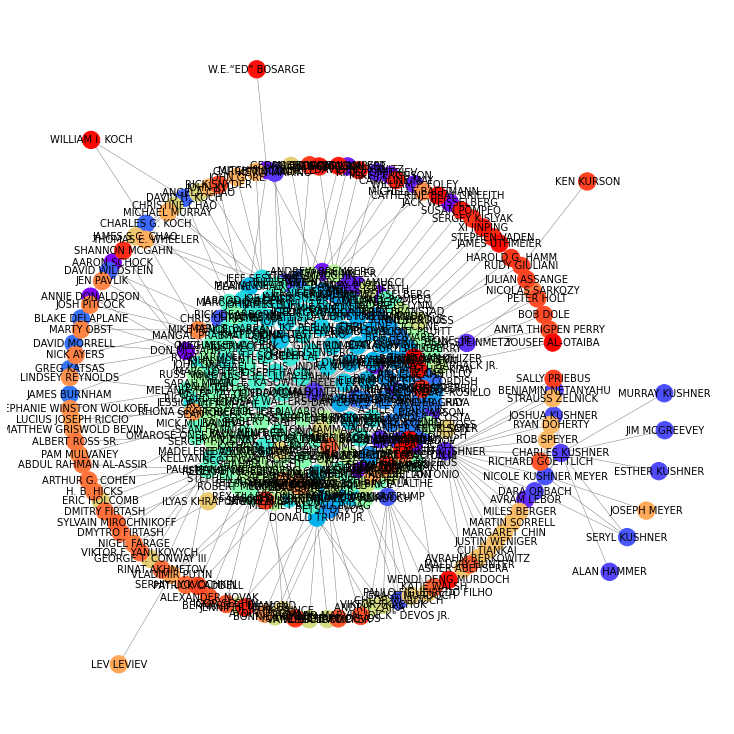

In [178]:
pos =nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G,
        pos,
        node_color=range(326),
        edge_color='gray',
        width=0.5,
        node_size=300,
        with_labels = True,
        cmap=plt.cm.rainbow,
        font_size=10)
plt.show()

In [179]:
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))
print("Average clustering:",nx.average_clustering(G))
print("Global clustering cofficient:", nx.transitivity(G))


Number of nodes: 326
Number of edges: 381
Average clustering: 0.15289933280558793
Global clustering cofficient: 0.011840750486214392


In [180]:
print ("since the Graph is not connected , find the biggest connected component")
for c in sorted(nx.connected_components(G), key=len, reverse=True):
  print (c)


since the Graph is not connected , find the biggest connected component
{'EDWIN MEESE', 'DAVID SHULKIN', 'VLADIMIR PUTIN', 'ROGER KHAFIF', 'ASHER ABEHSERA', 'JOE HAGIN', 'MILES BERGER', 'KEN KURSON', 'MITCH MCCONNELL', 'GRACE MURDOCH', 'SHERI A. DILLON', 'PATRICK CADDELL', 'ROBERT A. IGER', 'CHARLES G. KOCH', 'RAJ SHAH', 'SCOTT PRUITT', 'ALEXANDER ACOSTA', 'KELLYANNE CONWAY', 'RICHARD LEFRAK', 'ROB SPEYER', 'ANNIE DONALDSON', 'BILL STEPIEN', 'NICK AYERS', 'SERGEY KISLYAK', 'ERIK PRINCE', 'MICHAEL FLYNN', 'KATIE WALSH', 'DMITRY FIRTASH', 'BERNARD R. DIAMOND', 'MELANIA TRUMP', 'RICK DEARBORN', 'STEPHEN BANNON', 'CLIFF SIMS', 'DONALD TRUMP JR.', 'PHIL RUFFIN', 'UTTAM DHILLON', 'JUSTIN WENIGER', 'JASON D. MEISTER', 'PAUL MANAFORT', 'COREY LEWANDOWSKI', 'STEPHEN MUNISTERI', 'ANDREW BREMBERG', 'RICHARD MARVIN "DICK" DEVOS JR.', 'STEVEN N. CHEUNG', 'CUI TIANKAI', 'CARTER PAGE', 'HELEN FERRE', 'AVRAM LEBOR', 'BILL MCGINLEY', 'EMIN AGALAROV', 'MARTY OBST', 'LUCIUS JOSEPH RICCIO', 'WENDI DENG MU

In [182]:
g = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy() 
print (len(g.nodes))
print (len(g.edges))
print("Diameter:", nx.diameter(g))
print("Radius:", nx.radius(g))

303
366
Diameter: 6
Radius: 3


In [183]:
#clustering coeff for each node in the Graph (local clustring)

clustring_df = pd.DataFrame(list(nx.clustering(g).items()),columns = ['id','LCC'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(clustring_df)

                                  id       LCC
0                       AARON SCHOCK  1.000000
1                    ANNIE DONALDSON  1.000000
2                         DON MCGAHN  0.035714
3                      ALEXANDER NIX  1.000000
4                      BRAD PARSCALE  1.000000
5                  ALLEN WEISSELBERG  0.000000
6                   JACK WEISSELBERG  0.000000
7                    ANDREW BREMBERG  0.000000
8                      MIKE FERGUSON  0.000000
9                    MITCH MCCONNELL  0.000000
10                      SCOTT WALKER  0.000000
11                       ANDY PUZDER  0.000000
12                  WILLIAM P. FOLEY  0.000000
13                ANTHONY SCARAMUCCI  0.000000
14                   KIRILL DMITRIEV  0.000000
15                       AVRAM LEBOR  0.000000
16                     JARED KUSHNER  0.046784
17                        BEN CARSON  1.000000
18                     BARRY BENNETT  1.000000
19                      BILL STEPIEN  0.333333
20           

Average Local clustering cofficient: 46.84518249462167


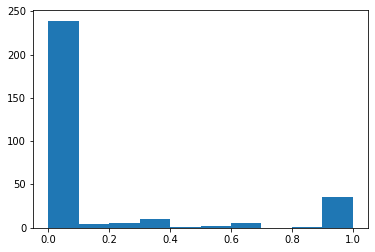

In [184]:
#average local clustering cofficient and the histogram for the above clustering coeff
cc = np.array([v for k, v in nx.clustering(g).items()])
sum_cc = np.sum(cc)
acc = np.mean(sum_cc)
print("Average Local clustering cofficient:",acc)

plt.hist(cc, bins=10)
plt.show()

In [185]:
#calculate average path length
print("Average shortest path length:",nx.average_shortest_path_length(g))

Average shortest path length: 2.810526085721155


(array([  1.,   0.,   2., 181.,   0.,   1., 108.,   0.,   0.,  10.]),
 array([1.42244224, 1.71782178, 2.01320132, 2.30858086, 2.6039604 ,
        2.89933993, 3.19471947, 3.49009901, 3.78547855, 4.08085809,
        4.37623762]),
 <a list of 10 Patch objects>)

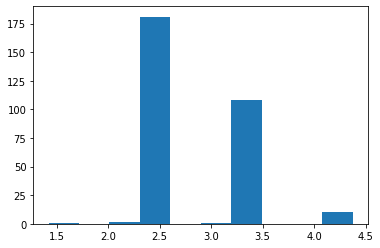

In [186]:
#histogram for shortest path length
#we will calculate the average of shortest paths between a node and all the remianing ones
pl_dic = {}
for k, v in nx.all_pairs_shortest_path_length(g):
    average_diffpaths = np.mean(list(v.values()))
    pl_dic[k]= average_diffpaths
#thus the histogram will be
plt.hist(pl_dic.values())

<BarContainer object of 184 artists>

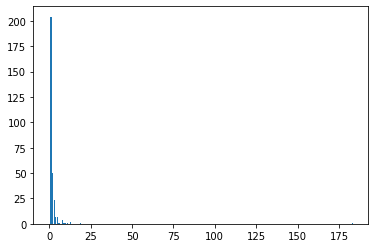

In [187]:
#degree distribution
plt.bar(range(len(nx.degree_histogram(g))),nx.degree_histogram(g))

Text(0, 0.5, 'probability')

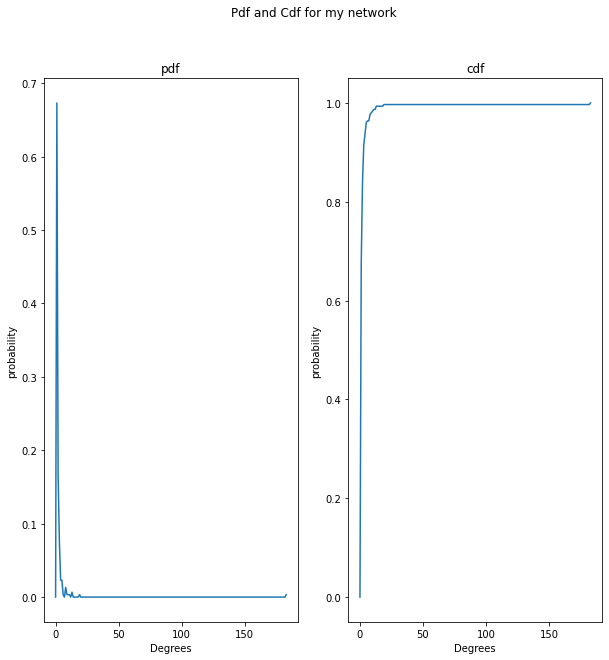

In [188]:
my_network_pdf = [deg_freq/len(g.nodes) for deg_freq in nx.degree_histogram(g)]
my_network_cdf = np.cumsum(my_network_pdf)

plt.figure(figsize=(10, 10))
plt.suptitle('Pdf and Cdf for my network')

plt.subplot(1,2,1)
plt.plot(my_network_pdf)
plt.title('pdf')
plt.xlabel('Degrees')
plt.ylabel('probability')
plt.subplot(1,2,2)
plt.plot(my_network_cdf)
plt.title('cdf')
plt.xlabel('Degrees')
plt.ylabel('probability')


### degree centrality 

In [189]:
degree_dic = centrality.degree_centrality(g)
print (degree_dic)

{'AARON SCHOCK': 0.006622516556291391, 'ANNIE DONALDSON': 0.006622516556291391, 'DON MCGAHN': 0.026490066225165563, 'ALEXANDER NIX': 0.006622516556291391, 'BRAD PARSCALE': 0.006622516556291391, 'ALLEN WEISSELBERG': 0.006622516556291391, 'JACK WEISSELBERG': 0.0033112582781456954, 'ANDREW BREMBERG': 0.013245033112582781, 'MIKE FERGUSON': 0.0033112582781456954, 'MITCH MCCONNELL': 0.009933774834437087, 'SCOTT WALKER': 0.0033112582781456954, 'ANDY PUZDER': 0.006622516556291391, 'WILLIAM P. FOLEY': 0.0033112582781456954, 'ANTHONY SCARAMUCCI': 0.006622516556291391, 'KIRILL DMITRIEV': 0.0033112582781456954, 'AVRAM LEBOR': 0.0033112582781456954, 'JARED KUSHNER': 0.06291390728476821, 'BEN CARSON': 0.006622516556291391, 'BARRY BENNETT': 0.006622516556291391, 'BILL STEPIEN': 0.009933774834437087, 'KEVIN MARINO': 0.006622516556291391, 'CARTER PAGE': 0.0033112582781456954, 'DONALD J. TRUMP': 0.6059602649006622, 'CHARLES KUSHNER': 0.033112582781456956, 'ALAN HAMMER': 0.0033112582781456954, 'BENJAMIN 

In [190]:
degree_centrality_df = pd.DataFrame(list(degree_dic.items()),columns = ['Name','Degree_Cen'])
degree_centrality_df.head()

Name  Degree_Cen
0     AARON SCHOCK    0.006623
1  ANNIE DONALDSON    0.006623
2       DON MCGAHN    0.026490
3    ALEXANDER NIX    0.006623
4    BRAD PARSCALE    0.006623

In [191]:
degree_centrality_df.sort_values(by=['Degree_Cen'],ascending=False)

Name  Degree_Cen
22        DONALD J. TRUMP    0.605960
16          JARED KUSHNER    0.062914
34           IVANKA TRUMP    0.043046
250            MIKE PENCE    0.043046
75       DONALD TRUMP JR.    0.036424
..                    ...         ...
126  MANGAL PRABHAT LODHA    0.003311
127      MARC E. KASOWITZ    0.003311
130         MARY T. BARRA    0.003311
134      MICHAEL D. COHEN    0.003311
302      YOUSEF AL-OTAIBA    0.003311

[303 rows x 2 columns]

In [192]:
node_sizes = []
for node in g.nodes():
  node_sizes.append (degree_dic[node] * 10000)
print(node_sizes)

[66.2251655629139, 66.2251655629139, 264.9006622516556, 66.2251655629139, 66.2251655629139, 66.2251655629139, 33.11258278145695, 132.4503311258278, 33.11258278145695, 99.33774834437087, 33.11258278145695, 66.2251655629139, 33.11258278145695, 66.2251655629139, 33.11258278145695, 33.11258278145695, 629.1390728476821, 66.2251655629139, 66.2251655629139, 99.33774834437087, 66.2251655629139, 33.11258278145695, 6059.602649006622, 331.12582781456956, 33.11258278145695, 66.2251655629139, 165.56291390728478, 33.11258278145695, 33.11258278145695, 132.4503311258278, 33.11258278145695, 198.67549668874173, 99.33774834437087, 99.33774834437087, 430.4635761589404, 99.33774834437087, 33.11258278145695, 99.33774834437087, 99.33774834437087, 66.2251655629139, 66.2251655629139, 33.11258278145695, 33.11258278145695, 33.11258278145695, 33.11258278145695, 33.11258278145695, 99.33774834437087, 33.11258278145695, 33.11258278145695, 33.11258278145695, 33.11258278145695, 33.11258278145695, 33.11258278145695, 66

degree Centrality


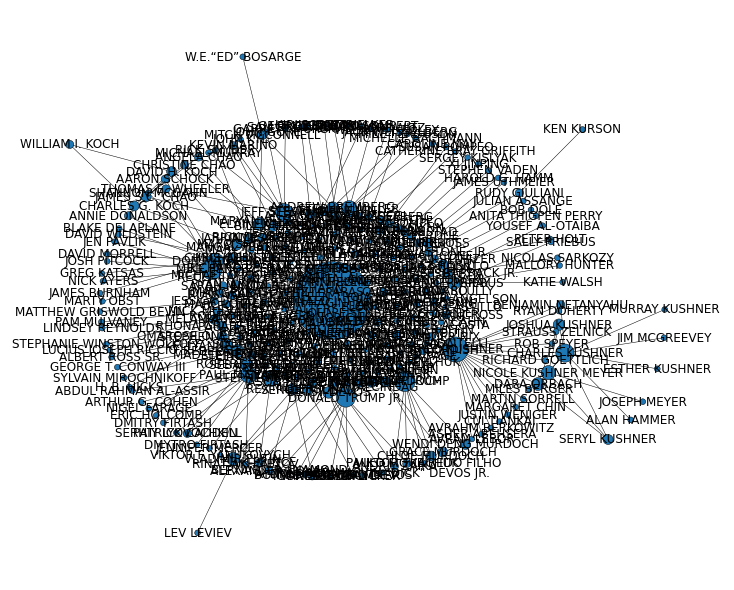

In [193]:
pos =nx.kamada_kawai_layout(g)
print("degree Centrality")
plt.figure(figsize=(10, 8))
nx.draw(g, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        with_labels = True,
        node_size=node_sizes
        )
plt.show()

In [194]:
nx.set_node_attributes(g, degree_dic, "Degree_cen")

In [230]:
rows_between = degree_centrality_df.sort_values(by=['Degree_Cen'],ascending=False).iloc[1:6]
print (list (rows_between['Name']))
for name in list (rows_between['Name']):
  
  print ('****************')
  print (name)
  for index, row in data.iterrows():
    
    if row['FPerson'] == name  or row['SPerson'] == name:  
      print(row['FPerson'], row['SPerson'], row['Connection'])

['JARED KUSHNER', 'IVANKA TRUMP', 'MIKE PENCE', 'DONALD TRUMP JR.', 'CHARLES KUSHNER']
name
****************
AVRAM LEBOR JARED KUSHNER Kushner hired him for his real estate company
DONALD J. TRUMP JARED KUSHNER Senior adviser
IVANKA TRUMP JARED KUSHNER Married
JARED KUSHNER ASHER ABEHSERA Partnered with Kushner in Brooklyn projects
JARED KUSHNER AVRAHM BERKOWITZ Assistant
JARED KUSHNER BENJAMIN NETANYAHU Longtime family friends, per Reuters
JARED KUSHNER CHARLES KUSHNER Parent/child
JARED KUSHNER CUI TIANKAI "Kushner and Cui have had an extensive ongoing dialogue that has been positive, according to a White House official," per Bloomberg
JARED KUSHNER DARA ORBACH Siblings
JARED KUSHNER JUSTIN WENIGER Friends
JARED KUSHNER MARGARET CHIN Donor
JARED KUSHNER MARTIN SORRELL Friends
JARED KUSHNER MILES BERGER "business partner of the Kushners," per New York Magazine
JARED KUSHNER NICOLE KUSHNER MEYER Siblings
JARED KUSHNER ROB SPEYER Gave Kushner $50 million to help by a property from his f

### closeness centrality

In [196]:
closeness_dic = centrality.closeness_centrality(g)
print (closeness_dic)

{'AARON SCHOCK': 0.2966601178781925, 'ANNIE DONALDSON': 0.2966601178781925, 'DON MCGAHN': 0.4206128133704735, 'ALEXANDER NIX': 0.4131326949384405, 'BRAD PARSCALE': 0.4131326949384405, 'ALLEN WEISSELBERG': 0.4136986301369863, 'JACK WEISSELBERG': 0.2929194956353055, 'ANDREW BREMBERG': 0.4171270718232044, 'MIKE FERGUSON': 0.2946341463414634, 'MITCH MCCONNELL': 0.2975369458128079, 'SCOTT WALKER': 0.2946341463414634, 'ANDY PUZDER': 0.4136986301369863, 'WILLIAM P. FOLEY': 0.2929194956353055, 'ANTHONY SCARAMUCCI': 0.4136986301369863, 'KIRILL DMITRIEV': 0.2929194956353055, 'AVRAM LEBOR': 0.3081632653061224, 'JARED KUSHNER': 0.44477172312223856, 'BEN CARSON': 0.4131326949384405, 'BARRY BENNETT': 0.4131326949384405, 'BILL STEPIEN': 0.41483516483516486, 'KEVIN MARINO': 0.2940603700097371, 'CARTER PAGE': 0.412568306010929, 'DONALD J. TRUMP': 0.7006960556844548, 'CHARLES KUSHNER': 0.31295336787564765, 'ALAN HAMMER': 0.23854660347551343, 'BENJAMIN NETANYAHU': 0.31006160164271046, 'DARA ORBACH': 0.31

In [197]:
closeness_centrality_df = pd.DataFrame(list(closeness_dic.items()),columns = ['Name','closeness_Cen'])
closeness_centrality_df.head()

Name  closeness_Cen
0     AARON SCHOCK       0.296660
1  ANNIE DONALDSON       0.296660
2       DON MCGAHN       0.420613
3    ALEXANDER NIX       0.413133
4    BRAD PARSCALE       0.413133

In [198]:
closeness_centrality_df.sort_values(by=['closeness_Cen'],ascending=False)

Name  closeness_Cen
22    DONALD J. TRUMP       0.700696
16      JARED KUSHNER       0.444772
34       IVANKA TRUMP       0.440233
250        MIKE PENCE       0.424754
75   DONALD TRUMP JR.       0.424157
..                ...            ...
238      JOSEPH MEYER       0.237795
297  W.E.“ED” BOSARGE       0.229483
239        LEV LEVIEV       0.229135
301   WILLIAM I. KOCH       0.229135
281        KEN KURSON       0.227753

[303 rows x 2 columns]

In [199]:
node_sizes = []
for node in g.nodes():
  node_sizes.append (closeness_dic[node] * 100)
print(node_sizes)

[29.66601178781925, 29.66601178781925, 42.061281337047355, 41.313269493844054, 41.313269493844054, 41.369863013698634, 29.29194956353055, 41.71270718232044, 29.46341463414634, 29.753694581280786, 29.46341463414634, 41.369863013698634, 29.29194956353055, 41.369863013698634, 29.29194956353055, 30.816326530612244, 44.47717231222386, 41.313269493844054, 41.313269493844054, 41.48351648351649, 29.40603700097371, 41.2568306010929, 70.06960556844548, 31.295336787564764, 23.85466034755134, 31.006160164271044, 31.1340206185567, 23.85466034755134, 23.85466034755134, 31.10195674562307, 23.85466034755134, 31.166150670794636, 23.91132224861441, 30.691056910569102, 44.02332361516035, 41.48351648351649, 29.348882410106903, 29.66601178781925, 29.66601178781925, 41.313269493844054, 41.313269493844054, 29.6368989205103, 29.6368989205103, 29.6368989205103, 29.6368989205103, 41.2568306010929, 41.71270718232044, 41.2568306010929, 41.2568306010929, 41.2568306010929, 41.2568306010929, 41.2568306010929, 41.256

closeness Centrality


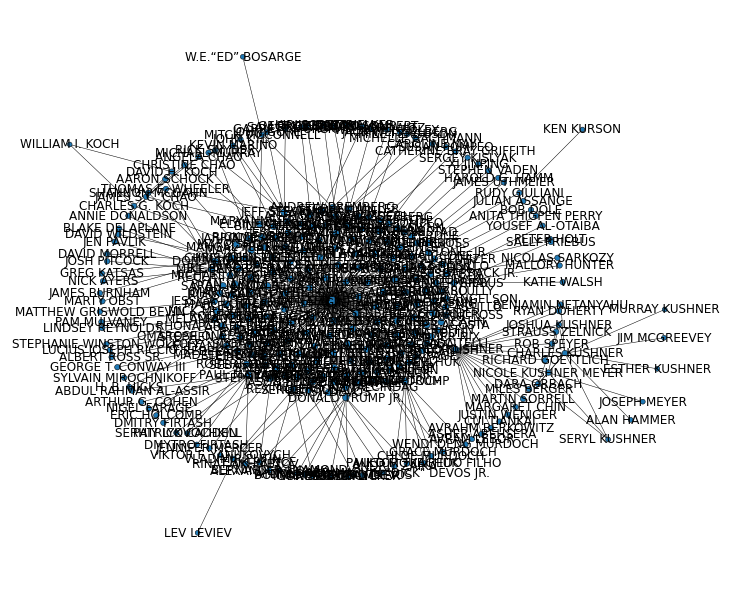

In [200]:
pos =nx.kamada_kawai_layout(g)
print("closeness Centrality")
plt.figure(figsize=(10, 8))
nx.draw(g, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        with_labels = True,
        node_size=node_sizes
        )
plt.show()

In [201]:
nx.set_node_attributes(g, closeness_dic, "Closeness_cen")

In [232]:
rows_between = closeness_centrality_df.sort_values(by=['closeness_Cen'],ascending=False).iloc[1:6]
print (" Top 5 persons in Closeness Centrality ",list (rows_between['Name']))
for name in list (rows_between['Name']):
  print ('****************')
  print (name)
  
  for index, row in data.iterrows():
    if row['FPerson'] == name  or row['SPerson'] == name:
      print(row['FPerson'], row['SPerson'], row['Connection'])

 Top 5 persons in Closeness Centrality  ['JARED KUSHNER', 'IVANKA TRUMP', 'MIKE PENCE', 'DONALD TRUMP JR.', 'JEFF SESSIONS']
****************
JARED KUSHNER
AVRAM LEBOR JARED KUSHNER Kushner hired him for his real estate company
DONALD J. TRUMP JARED KUSHNER Senior adviser
IVANKA TRUMP JARED KUSHNER Married
JARED KUSHNER ASHER ABEHSERA Partnered with Kushner in Brooklyn projects
JARED KUSHNER AVRAHM BERKOWITZ Assistant
JARED KUSHNER BENJAMIN NETANYAHU Longtime family friends, per Reuters
JARED KUSHNER CHARLES KUSHNER Parent/child
JARED KUSHNER CUI TIANKAI "Kushner and Cui have had an extensive ongoing dialogue that has been positive, according to a White House official," per Bloomberg
JARED KUSHNER DARA ORBACH Siblings
JARED KUSHNER JUSTIN WENIGER Friends
JARED KUSHNER MARGARET CHIN Donor
JARED KUSHNER MARTIN SORRELL Friends
JARED KUSHNER MILES BERGER "business partner of the Kushners," per New York Magazine
JARED KUSHNER NICOLE KUSHNER MEYER Siblings
JARED KUSHNER ROB SPEYER Gave Kushn

### betweenness centrality

In [203]:
betweenness_dic = centrality.betweenness_centrality(g)
print (betweenness_dic)

{'AARON SCHOCK': 0.0, 'ANNIE DONALDSON': 0.0, 'DON MCGAHN': 0.045873578139094845, 'ALEXANDER NIX': 0.0, 'BRAD PARSCALE': 0.0, 'ALLEN WEISSELBERG': 0.006622516556291391, 'JACK WEISSELBERG': 0.0, 'ANDREW BREMBERG': 0.019691535939803304, 'MIKE FERGUSON': 0.0, 'MITCH MCCONNELL': 0.006754526853094541, 'SCOTT WALKER': 0.0, 'ANDY PUZDER': 0.006622516556291391, 'WILLIAM P. FOLEY': 0.0, 'ANTHONY SCARAMUCCI': 0.006622516556291391, 'KIRILL DMITRIEV': 0.0, 'AVRAM LEBOR': 0.0, 'JARED KUSHNER': 0.1455853556577413, 'BEN CARSON': 0.0, 'BARRY BENNETT': 0.0, 'BILL STEPIEN': 0.0033222591362126242, 'KEVIN MARINO': 1.100085806692922e-05, 'CARTER PAGE': 0.0, 'DONALD J. TRUMP': 0.9742249895491845, 'CHARLES KUSHNER': 0.028572895352504252, 'ALAN HAMMER': 0.0, 'BENJAMIN NETANYAHU': 0.0, 'DARA ORBACH': 0.0021488342757401916, 'ESTHER KUSHNER': 0.0, 'JIM MCGREEVEY': 0.0, 'JOSHUA KUSHNER': 0.0, 'MURRAY KUSHNER': 0.0, 'NICOLE KUSHNER MEYER': 0.008771350832031576, 'SERYL KUSHNER': 0.0, 'CHLOE MURDOCH': 3.666952688976

In [204]:
betweenness_centrality_df = pd.DataFrame(list(betweenness_dic.items()),columns = ['Name','betweenness_Cen'])
betweenness_centrality_df.head()

Name  betweenness_Cen
0     AARON SCHOCK         0.000000
1  ANNIE DONALDSON         0.000000
2       DON MCGAHN         0.045874
3    ALEXANDER NIX         0.000000
4    BRAD PARSCALE         0.000000

In [205]:
betweenness_centrality_df.sort_values(by=['betweenness_Cen'],ascending=False)

Name  betweenness_Cen
22            DONALD J. TRUMP         0.974225
16              JARED KUSHNER         0.145585
145             PAUL MANAFORT         0.045896
2                  DON MCGAHN         0.045874
75           DONALD TRUMP JR.         0.032258
..                        ...              ...
117             KALPESH MEHTA         0.000000
118  KATHLEEN TROIA MCFARLAND         0.000000
119           KATHRYN TALENTO         0.000000
120            KEITH SCHILLER         0.000000
302          YOUSEF AL-OTAIBA         0.000000

[303 rows x 2 columns]

In [206]:
node_sizes = []
for node in g.nodes():
  node_sizes.append (betweenness_dic[node] * 1000)
print(node_sizes)

[0.0, 0.0, 45.873578139094846, 0.0, 0.0, 6.622516556291391, 0.0, 19.691535939803305, 0.0, 6.754526853094541, 0.0, 6.622516556291391, 0.0, 6.622516556291391, 0.0, 0.0, 145.5853556577413, 0.0, 0.0, 3.322259136212624, 0.01100085806692922, 0.0, 974.2249895491844, 28.572895352504254, 0.0, 0.0, 2.1488342757401915, 0.0, 0.0, 0.0, 0.0, 8.771350832031576, 0.0, 0.03666952688976407, 30.388036933547482, 6.622516556291391, 0.0, 3.300257420078766, 3.300257420078766, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.622516556291391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.372943756279653, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.25818280492545, 0.0, 0.0, 26.215044773492334, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.622516556291391, 0.0, 0.0, 29.731652402220703, 0.0, 0.0, 6.622516556291391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1833476344488203, 0.0, 0.0, 0.0, 0.0, 0.0, 13.22303139644892

betweenness Centrality


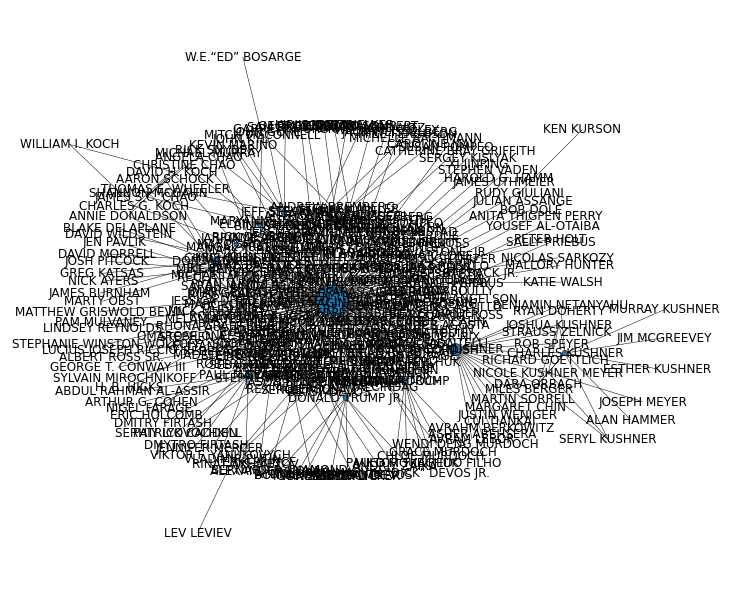

In [207]:
pos =nx.kamada_kawai_layout(g)
print("betweenness Centrality")
plt.figure(figsize=(10, 8))
nx.draw(g, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        with_labels = True,
        node_size=node_sizes
        )
plt.show()

In [208]:
nx.set_node_attributes(g, betweenness_dic, "Betweenness_cen")

In [233]:
rows_between = betweenness_centrality_df.sort_values(by=['betweenness_Cen'],ascending=False).iloc[1:6]
print (" Top 5 persons in Betweenness Centrality ",list (rows_between['Name']))
for name in list (rows_between['Name']):
  print ('****************')
  print (name)
  for index, row in data.iterrows():
    if row['FPerson'] == name  or row['SPerson'] == name:
      print(row['FPerson'], row['SPerson'], row['Connection'])

 Top 5 persons in Betweenness Centrality  ['JARED KUSHNER', 'PAUL MANAFORT', 'DON MCGAHN', 'DONALD TRUMP JR.', 'IVANKA TRUMP']
****************
JARED KUSHNER
AVRAM LEBOR JARED KUSHNER Kushner hired him for his real estate company
DONALD J. TRUMP JARED KUSHNER Senior adviser
IVANKA TRUMP JARED KUSHNER Married
JARED KUSHNER ASHER ABEHSERA Partnered with Kushner in Brooklyn projects
JARED KUSHNER AVRAHM BERKOWITZ Assistant
JARED KUSHNER BENJAMIN NETANYAHU Longtime family friends, per Reuters
JARED KUSHNER CHARLES KUSHNER Parent/child
JARED KUSHNER CUI TIANKAI "Kushner and Cui have had an extensive ongoing dialogue that has been positive, according to a White House official," per Bloomberg
JARED KUSHNER DARA ORBACH Siblings
JARED KUSHNER JUSTIN WENIGER Friends
JARED KUSHNER MARGARET CHIN Donor
JARED KUSHNER MARTIN SORRELL Friends
JARED KUSHNER MILES BERGER "business partner of the Kushners," per New York Magazine
JARED KUSHNER NICOLE KUSHNER MEYER Siblings
JARED KUSHNER ROB SPEYER Gave Kus

### eigenvector centrality

In [210]:
eigenvector_dic = centrality.eigenvector_centrality(g)
print (eigenvector_dic)

{'AARON SCHOCK': 0.004099006461406719, 'ANNIE DONALDSON': 0.004099006461406719, 'DON MCGAHN': 0.052487597448008676, 'ALEXANDER NIX': 0.054461670513640544, 'BRAD PARSCALE': 0.054461670513640544, 'ALLEN WEISSELBERG': 0.050783071985852024, 'JACK WEISSELBERG': 0.0036785985277885246, 'ANDREW BREMBERG': 0.05160454516985725, 'MIKE FERGUSON': 0.003738103888346324, 'MITCH MCCONNELL': 0.007542230592739331, 'SCOTT WALKER': 0.003738103888346324, 'ANDY PUZDER': 0.050783071985852024, 'WILLIAM P. FOLEY': 0.0036785985277885246, 'ANTHONY SCARAMUCCI': 0.050783071985852024, 'KIRILL DMITRIEV': 0.0036785985277885246, 'AVRAM LEBOR': 0.004529579676389637, 'JARED KUSHNER': 0.06253061922526981, 'BEN CARSON': 0.054461670513640544, 'BARRY BENNETT': 0.054461670513640544, 'BILL STEPIEN': 0.055042384142330716, 'KEVIN MARINO': 0.0076867779505730306, 'CARTER PAGE': 0.05051658938653415, 'DONALD J. TRUMP': 0.6973459084798828, 'CHARLES KUSHNER': 0.0064102275479376684, 'ALAN HAMMER': 0.00046435874514605304, 'BENJAMIN NET

In [211]:
eigenvector_centrality_df = pd.DataFrame(list(eigenvector_dic.items()),columns = ['Name','eigenvector_Cen'])
eigenvector_centrality_df.head()

Name  eigenvector_Cen
0     AARON SCHOCK         0.004099
1  ANNIE DONALDSON         0.004099
2       DON MCGAHN         0.052488
3    ALEXANDER NIX         0.054462
4    BRAD PARSCALE         0.054462

In [212]:
eigenvector_centrality_df.sort_values(by=['eigenvector_Cen'],ascending=False)

Name  eigenvector_Cen
22    DONALD J. TRUMP         0.697346
34       IVANKA TRUMP         0.082308
250        MIKE PENCE         0.081688
75   DONALD TRUMP JR.         0.073347
189    STEPHEN BANNON         0.070129
..                ...              ...
27     ESTHER KUSHNER         0.000464
28      JIM MCGREEVEY         0.000464
30     MURRAY KUSHNER         0.000464
238      JOSEPH MEYER         0.000433
281        KEN KURSON         0.000269

[303 rows x 2 columns]

In [213]:
node_sizes = []
for node in g.nodes():
  node_sizes.append (eigenvector_dic[node] * 500)
print(node_sizes)

[2.0495032307033596, 2.0495032307033596, 26.24379872400434, 27.23083525682027, 27.23083525682027, 25.391535992926013, 1.8392992638942622, 25.802272584928623, 1.8690519441731621, 3.7711152963696657, 1.8690519441731621, 25.391535992926013, 1.8392992638942622, 25.391535992926013, 1.8392992638942622, 2.2647898381948184, 31.265309612634905, 27.23083525682027, 27.23083525682027, 27.52119207116536, 3.843388975286515, 25.258294693267075, 348.67295423994136, 3.2051137739688342, 0.2321793725730265, 2.4969692107678445, 2.973718398370002, 0.2321793725730265, 0.2321793725730265, 2.928863332227649, 0.2321793725730265, 2.9883403762831517, 0.6640734940328314, 5.1344993741882545, 41.153806720399935, 27.395625704318263, 1.984477671066806, 2.254625040295218, 2.254625040295218, 27.230835256820274, 27.230835256820274, 1.9010350203932167, 1.9010350203932167, 1.9010350203932167, 1.9010350203932167, 25.258294693267075, 27.772560675936255, 25.258294693267075, 25.258294693267075, 25.258294693267075, 25.25829469

eigenvector Centrality


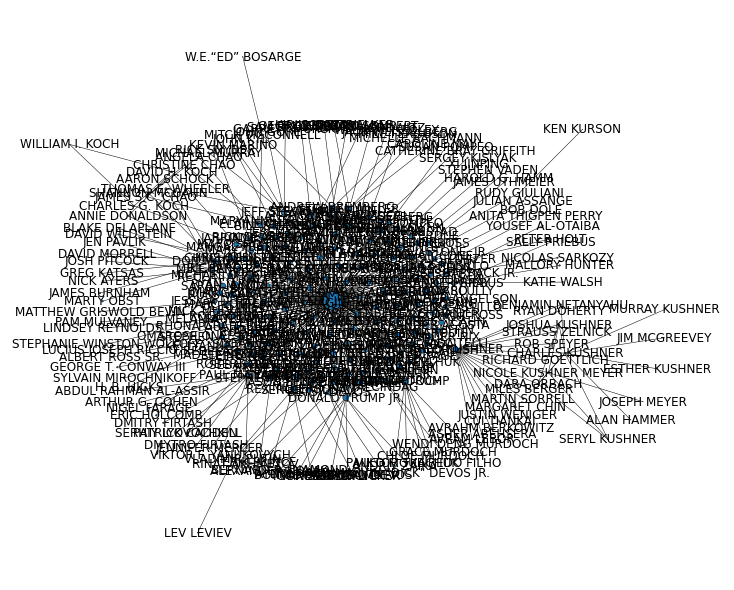

In [214]:
pos =nx.kamada_kawai_layout(g)
print("eigenvector Centrality")
#display(central[c_key])
plt.figure(figsize=(10, 8))
nx.draw(g, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        with_labels = True,
        node_size=node_sizes
        )
plt.show()

In [215]:
nx.set_node_attributes(g, eigenvector_dic, "Eigenvector_cen")

In [216]:
eigenvector_centrality_df.sort_values(by=['eigenvector_Cen'],ascending=False)

Name  eigenvector_Cen
22    DONALD J. TRUMP         0.697346
34       IVANKA TRUMP         0.082308
250        MIKE PENCE         0.081688
75   DONALD TRUMP JR.         0.073347
189    STEPHEN BANNON         0.070129
..                ...              ...
27     ESTHER KUSHNER         0.000464
28      JIM MCGREEVEY         0.000464
30     MURRAY KUSHNER         0.000464
238      JOSEPH MEYER         0.000433
281        KEN KURSON         0.000269

[303 rows x 2 columns]

In [234]:
rows_between = eigenvector_centrality_df.sort_values(by=['eigenvector_Cen'],ascending=False).iloc[1:6]
print (" Top 5 persons in EigenVector Centrality ",list (rows_between['Name']))
for name in list (rows_between['Name']):
  print ('****************')
  print (name)
  for index, row in data.iterrows():
    if row['FPerson'] == name  or row['SPerson'] == name:
      print(row['FPerson'], row['SPerson'], row['Connection'])

 Top 5 persons in EigenVector Centrality  ['IVANKA TRUMP', 'MIKE PENCE', 'DONALD TRUMP JR.', 'STEPHEN BANNON', 'FELIPE YARYURA']
****************
IVANKA TRUMP
CHLOE MURDOCH IVANKA TRUMP Former trustee
DONALD J. TRUMP IVANKA TRUMP Parent/child
GRACE MURDOCH IVANKA TRUMP Former trustee
IVANKA TRUMP ANDRIY ZAIKA Met in 2006, when Zaika was head of the Ukrainian Construction Consortium
IVANKA TRUMP DINA POWELL Ivanka Trump "has been leaning on [Powell] ... as a top adviser on policy and staffing," per Politico
IVANKA TRUMP DONALD TRUMP JR. Siblings
IVANKA TRUMP ERIC TRUMP Siblings
IVANKA TRUMP FELIPE YARYURA The Argentine real estate developer is said to be friends with the Trump family
IVANKA TRUMP JARED KUSHNER Married
IVANKA TRUMP MEHMET ALI YALCINDAG Business partners
IVANKA TRUMP PAULO FIGUEIREDO FILHO Lunched together, spawning Trump interest in Rio hotel
IVANKA TRUMP VIKTOR TKACHUK Met in 2006, when Tkachuk was an adviser to the Ukrainian president
WENDI DENG MURDOCH IVANKA TRUMP "C

### Page Rank

In [218]:
pr = nx.pagerank(g, alpha=0.9)
print (pr)

{'AARON SCHOCK': 0.0029367050207443407, 'ANNIE DONALDSON': 0.0029367050207443407, 'DON MCGAHN': 0.011421698972426182, 'ALEXANDER NIX': 0.00274875116523282, 'BRAD PARSCALE': 0.00274875116523282, 'ALLEN WEISSELBERG': 0.003039660466882384, 'JACK WEISSELBERG': 0.0016984303114116175, 'ANDREW BREMBERG': 0.005613180788002984, 'MIKE FERGUSON': 0.0015935777750061902, 'MITCH MCCONNELL': 0.004116004664859875, 'SCOTT WALKER': 0.0015935777750061902, 'ANDY PUZDER': 0.003039660466882384, 'WILLIAM P. FOLEY': 0.0016984303114116175, 'ANTHONY SCARAMUCCI': 0.003039660466882384, 'KIRILL DMITRIEV': 0.0016984303114116175, 'AVRAM LEBOR': 0.0014059454862894948, 'JARED KUSHNER': 0.022711506431806094, 'BEN CARSON': 0.00274875116523282, 'BARRY BENNETT': 0.00274875116523282, 'BILL STEPIEN': 0.003993533333561908, 'KEVIN MARINO': 0.0027697211040248475, 'CARTER PAGE': 0.001511659664029698, 'DONALD J. TRUMP': 0.24035249150642116, 'CHARLES KUSHNER': 0.011231017199562841, 'ALAN HAMMER': 0.0013408058511956255, 'BENJAMIN 

In [219]:
Page_Rank_df = pd.DataFrame(list(pr.items()),columns = ['Name','pr'])
Page_Rank_df.head()

Name        pr
0     AARON SCHOCK  0.002937
1  ANNIE DONALDSON  0.002937
2       DON MCGAHN  0.011422
3    ALEXANDER NIX  0.002749
4    BRAD PARSCALE  0.002749

In [220]:
Page_Rank_df.sort_values(by=['pr'],ascending=False)

Name        pr
22          DONALD J. TRUMP  0.240352
16            JARED KUSHNER  0.022712
250              MIKE PENCE  0.016063
34             IVANKA TRUMP  0.014355
75         DONALD TRUMP JR.  0.012823
..                      ...       ...
24              ALAN HAMMER  0.001341
27           ESTHER KUSHNER  0.001341
30           MURRAY KUSHNER  0.001341
221  PAULO FIGUEIREDO FILHO  0.001324
238            JOSEPH MEYER  0.001309

[303 rows x 2 columns]

In [221]:
node_sizes = []
for node in g.nodes():
  node_sizes.append (pr[node] * 10000)
print(node_sizes)

[29.367050207443405, 29.367050207443405, 114.21698972426182, 27.487511652328198, 27.487511652328198, 30.39660466882384, 16.984303114116177, 56.13180788002984, 15.935777750061902, 41.16004664859875, 15.935777750061902, 30.39660466882384, 16.984303114116177, 30.39660466882384, 16.984303114116177, 14.059454862894949, 227.11506431806094, 27.487511652328198, 27.487511652328198, 39.93533333561908, 27.697211040248476, 15.116596640296981, 2403.5249150642117, 112.31017199562841, 13.408058511956256, 24.167183341847903, 53.62317837194562, 13.408058511956256, 13.408058511956256, 43.608601717945085, 13.408058511956256, 65.26638166179129, 32.84947688805344, 33.97870752072605, 143.55025018327368, 41.19150175571205, 15.658900444368228, 36.235384672544185, 36.235384672544185, 27.487511652328198, 27.487511652328198, 16.15285246037937, 16.15285246037937, 16.15285246037937, 16.15285246037937, 15.116596640296981, 40.78000936206421, 15.116596640296981, 15.116596640296981, 15.116596640296981, 15.116596640296

Page Rank


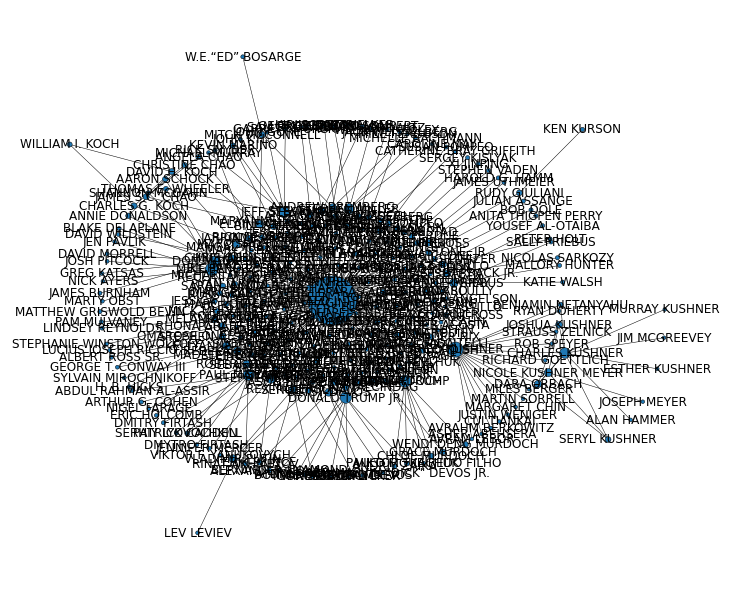

In [222]:
pos =nx.kamada_kawai_layout(g)
print("Page Rank")
plt.figure(figsize=(10, 8))
nx.draw(g, 
        pos,
        width=0.5,
        linewidths=0.5,
        edgecolors='black',
        cmap=plt.cm.hot,
        with_labels = True,
        node_size=node_sizes
        )
plt.show()

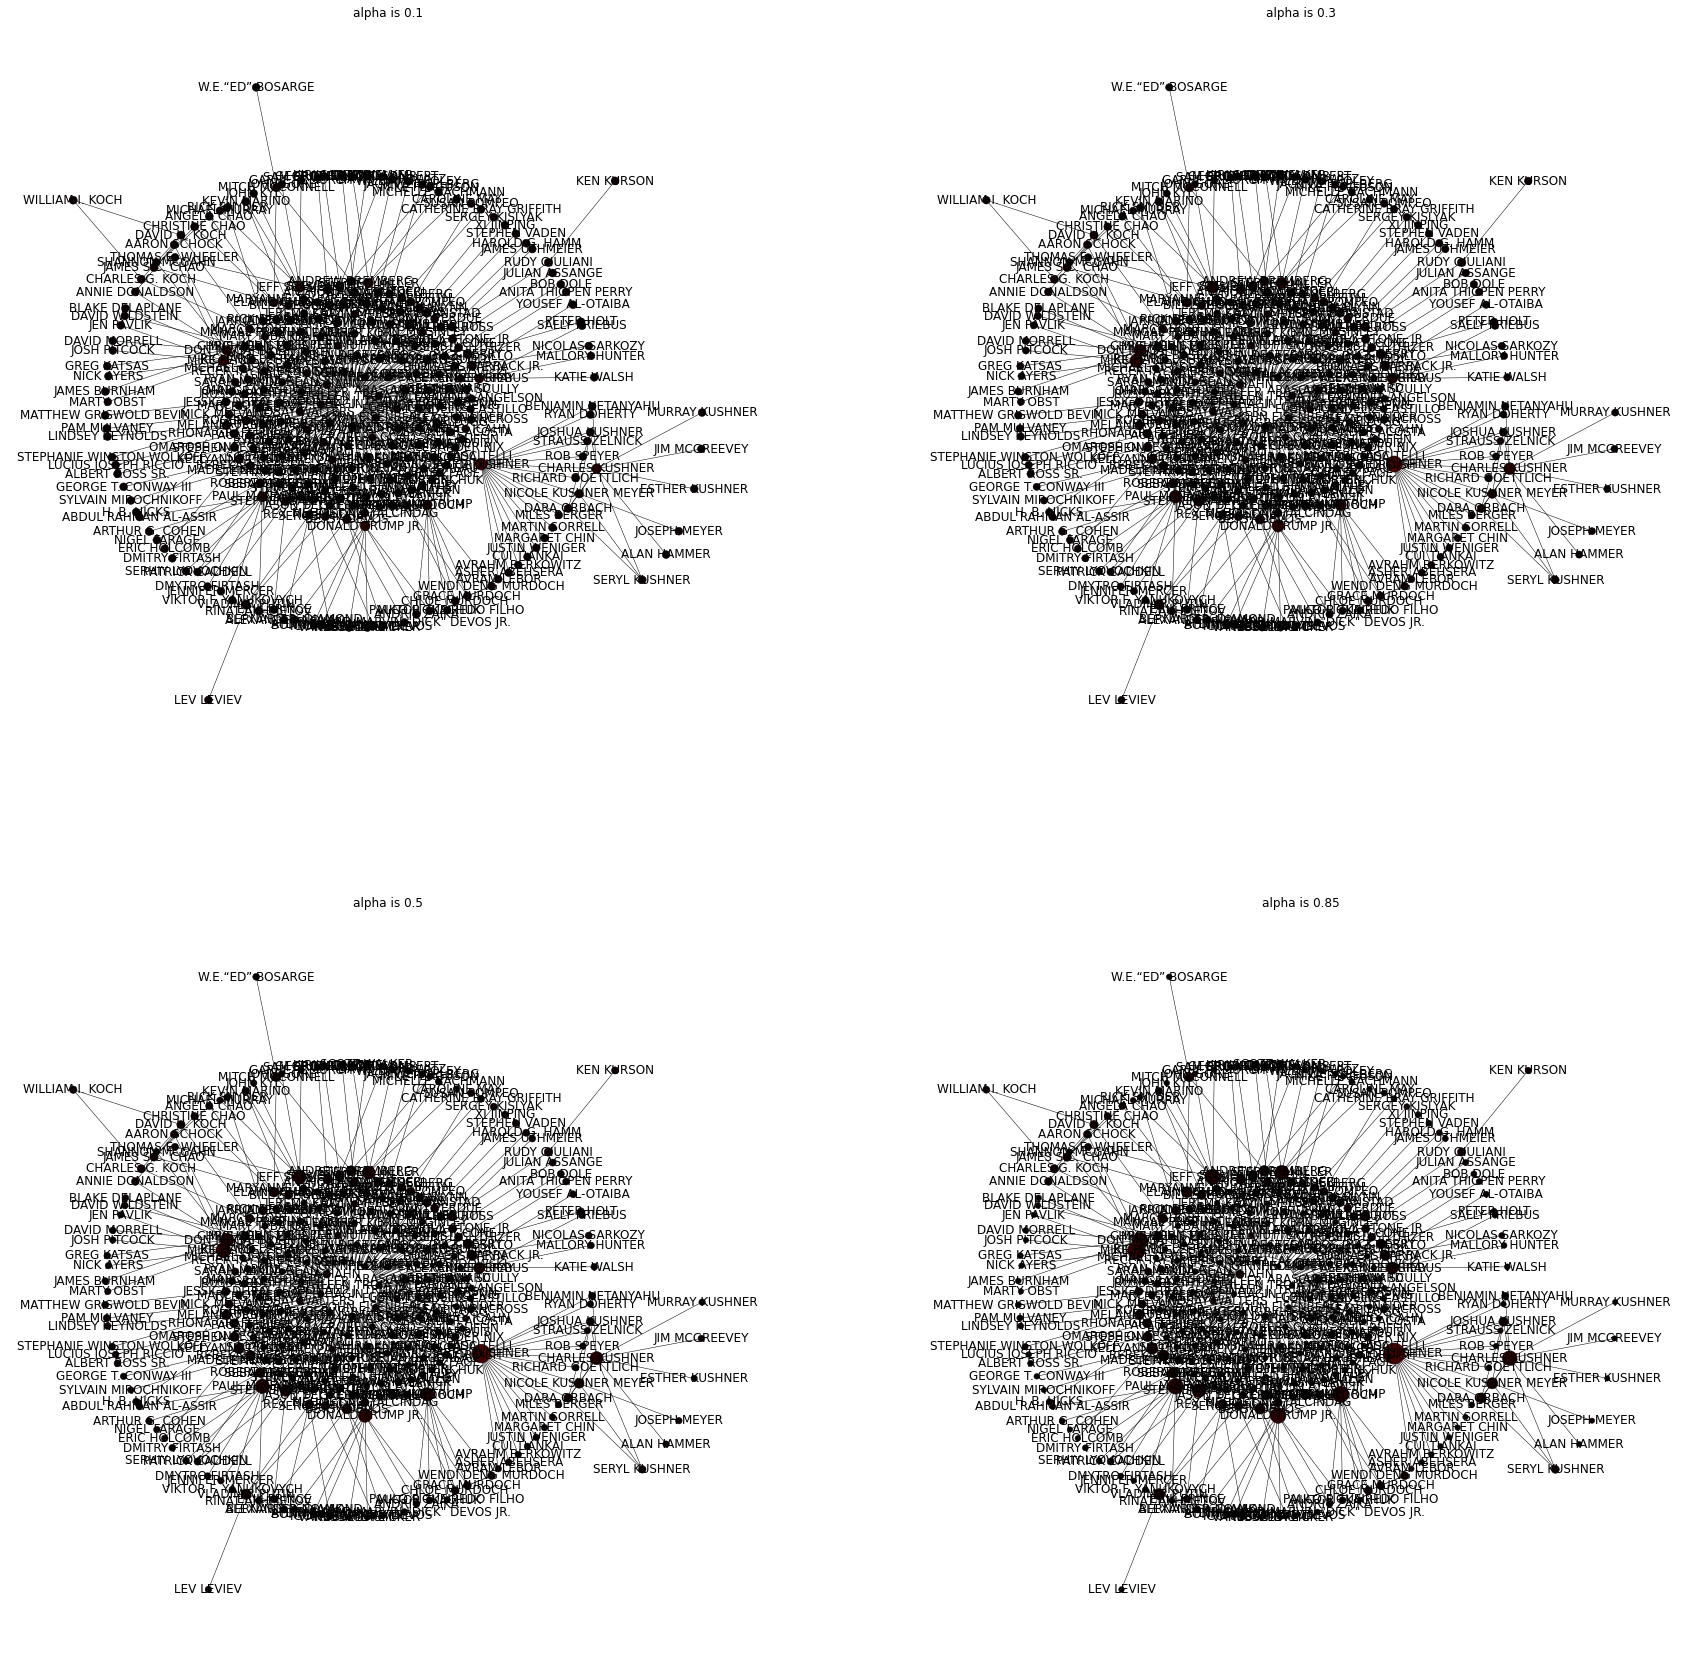

In [223]:
plt.figure(figsize=(30, 30))
alphas = [0.1 , 0.3 , 0.5 , 0.85]
pos =nx.kamada_kawai_layout(g)
for index , alpha  in enumerate(alphas):
    plt.subplot(2, 2, index+1)
    PR = np.array(list(nx.pagerank(g, alpha= alpha).values()))
    nx.draw(g, 
            pos,
            width=0.5,
            linewidths=0.5,
            edgecolors='black',
            cmap=plt.cm.hot,
            with_labels = True,
            node_size=PR *2e4 ,
            node_color=PR)
    plt.title('alpha is {}'.format(alpha))
    #plt.show()

In [224]:
alphas = [0.1 , 0.3 , 0.5 , 0.85]
for alpha  in alphas:
    pageranker_dic = nx.pagerank(g, alpha)
    Page_Rank_df = pd.DataFrame(list(pr.items()),columns = ['Name','pr'])
    
    print('alpha is {}'.format(alpha))
    display(Page_Rank_df.sort_values(by=['pr'],ascending=False))

alpha is 0.1


Name        pr
22          DONALD J. TRUMP  0.240352
16            JARED KUSHNER  0.022712
250              MIKE PENCE  0.016063
34             IVANKA TRUMP  0.014355
75         DONALD TRUMP JR.  0.012823
..                      ...       ...
24              ALAN HAMMER  0.001341
27           ESTHER KUSHNER  0.001341
30           MURRAY KUSHNER  0.001341
221  PAULO FIGUEIREDO FILHO  0.001324
238            JOSEPH MEYER  0.001309

[303 rows x 2 columns]

alpha is 0.3


Name        pr
22          DONALD J. TRUMP  0.240352
16            JARED KUSHNER  0.022712
250              MIKE PENCE  0.016063
34             IVANKA TRUMP  0.014355
75         DONALD TRUMP JR.  0.012823
..                      ...       ...
24              ALAN HAMMER  0.001341
27           ESTHER KUSHNER  0.001341
30           MURRAY KUSHNER  0.001341
221  PAULO FIGUEIREDO FILHO  0.001324
238            JOSEPH MEYER  0.001309

[303 rows x 2 columns]

alpha is 0.5


Name        pr
22          DONALD J. TRUMP  0.240352
16            JARED KUSHNER  0.022712
250              MIKE PENCE  0.016063
34             IVANKA TRUMP  0.014355
75         DONALD TRUMP JR.  0.012823
..                      ...       ...
24              ALAN HAMMER  0.001341
27           ESTHER KUSHNER  0.001341
30           MURRAY KUSHNER  0.001341
221  PAULO FIGUEIREDO FILHO  0.001324
238            JOSEPH MEYER  0.001309

[303 rows x 2 columns]

alpha is 0.85


Name        pr
22          DONALD J. TRUMP  0.240352
16            JARED KUSHNER  0.022712
250              MIKE PENCE  0.016063
34             IVANKA TRUMP  0.014355
75         DONALD TRUMP JR.  0.012823
..                      ...       ...
24              ALAN HAMMER  0.001341
27           ESTHER KUSHNER  0.001341
30           MURRAY KUSHNER  0.001341
221  PAULO FIGUEIREDO FILHO  0.001324
238            JOSEPH MEYER  0.001309

[303 rows x 2 columns]

In [225]:
nx.set_node_attributes(g, pr, "PageRank_cen")

In [226]:
rows_between = Page_Rank_df.sort_values(by=['pr'],ascending=False).iloc[1:6]
print (" Top 5 persons in PageRank Centrality ",list (rows_between['Name']))
for name in list (rows_between['Name']):
  print('*******')
  print(name)
  for index, row in data.iterrows():
    if row['FPerson'] == name  or row['SPerson'] == name:
      print(row['FPerson'], row['SPerson'], row['Connection'])

 Top 5 persons in PageRank Centrality  ['JARED KUSHNER', 'MIKE PENCE', 'IVANKA TRUMP', 'DONALD TRUMP JR.', 'PAUL MANAFORT']
AVRAM LEBOR JARED KUSHNER Kushner hired him for his real estate company
DONALD J. TRUMP JARED KUSHNER Senior adviser
IVANKA TRUMP JARED KUSHNER Married
JARED KUSHNER ASHER ABEHSERA Partnered with Kushner in Brooklyn projects
JARED KUSHNER AVRAHM BERKOWITZ Assistant
JARED KUSHNER BENJAMIN NETANYAHU Longtime family friends, per Reuters
JARED KUSHNER CHARLES KUSHNER Parent/child
JARED KUSHNER CUI TIANKAI "Kushner and Cui have had an extensive ongoing dialogue that has been positive, according to a White House official," per Bloomberg
JARED KUSHNER DARA ORBACH Siblings
JARED KUSHNER JUSTIN WENIGER Friends
JARED KUSHNER MARGARET CHIN Donor
JARED KUSHNER MARTIN SORRELL Friends
JARED KUSHNER MILES BERGER "business partner of the Kushners," per New York Magazine
JARED KUSHNER NICOLE KUSHNER MEYER Siblings
JARED KUSHNER ROB SPEYER Gave Kushner $50 million to help by a prop

### output to a gephi

In [227]:
nx.write_gexf(g, "my_graph.gexf")